# implementing Decision tree regressor

In [1]:
# importing requirements
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# path of csv file
global _path
_path = os.path.dirname(os.getcwd()) + '/No Null/no-null-horse-details.csv'
_path

'/Users/pan/Desktop/proj/MLHD/No Null/no-null-horse-details.csv'

In [2]:
# reading dataset using pandas
hd = pd.read_csv(_path)
hd

,Unnamed: 0,Serial no.,Horse id,Horse-Gender,Horse-Height,Horse-Weight,Racer-Horse
0,3,4,H4,M,51.0,409.0,Yes
1,8,9,H9,F,46.0,389.0,Yes
2,9,10,H10,M,63.0,731.0,No
3,22,23,H23,M,72.0,1181.0,No
4,26,27,H27,F,60.0,607.0,No
...,...,...,...,...,...,...,...
42858,99985,99986,H99986,F,47.0,386.0,No
42859,99986,99987,H99987,F,52.0,444.0,No
42860,99988,99989,H99989,F,60.0,664.0,Yes
42861,99994,99995,H99995,F,64.0,811.0,No


<AxesSubplot:xlabel='Horse-Height', ylabel='Horse-Weight'>

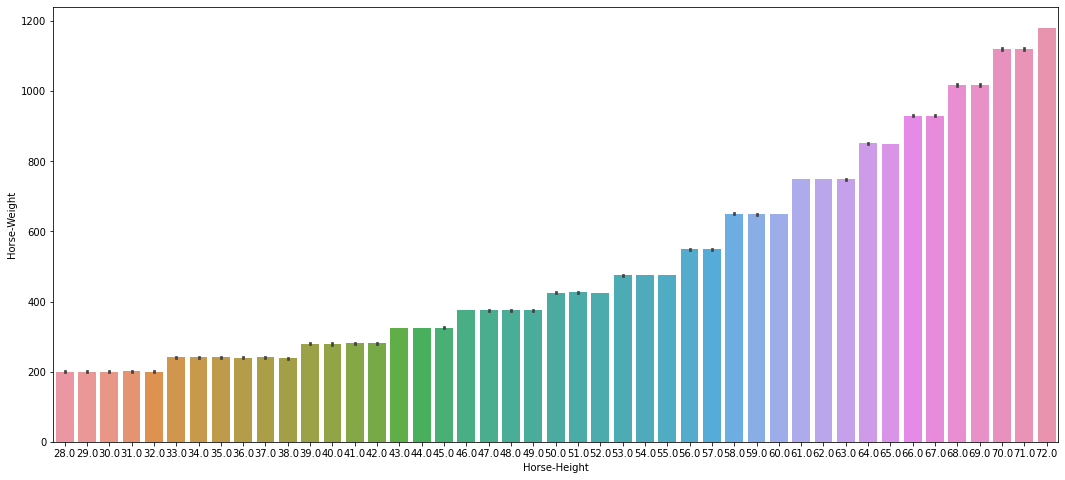

In [3]:
# display the realation between height and weight as graph
plt.subplots(figsize=(18, 8))
sns.barplot(x='Horse-Height', y='Horse-Weight', data=hd)

In [4]:
# now extract dependent and independent value from horse data
X = hd.iloc[:, 4:5].values
print(X)
y = hd.iloc[:, 5:6].values
y

[[51.]
 [46.]
 [63.]
 ...
 [60.]
 [64.]
 [63.]]


array([[409.],
       [389.],
       [731.],
       ...,
       [664.],
       [811.],
       [785.]])

In [5]:
# now split our data into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=1/3)

### now build our model

In [6]:
from sklearn.tree import DecisionTreeRegressor

# now creating the model
dtr = DecisionTreeRegressor()

# now build our model
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [7]:
# now only plot best fit lines
orders = np.argsort(X_train.ravel())
orders

array([21239, 25547, 18618, ..., 12520, 12345, 17547])

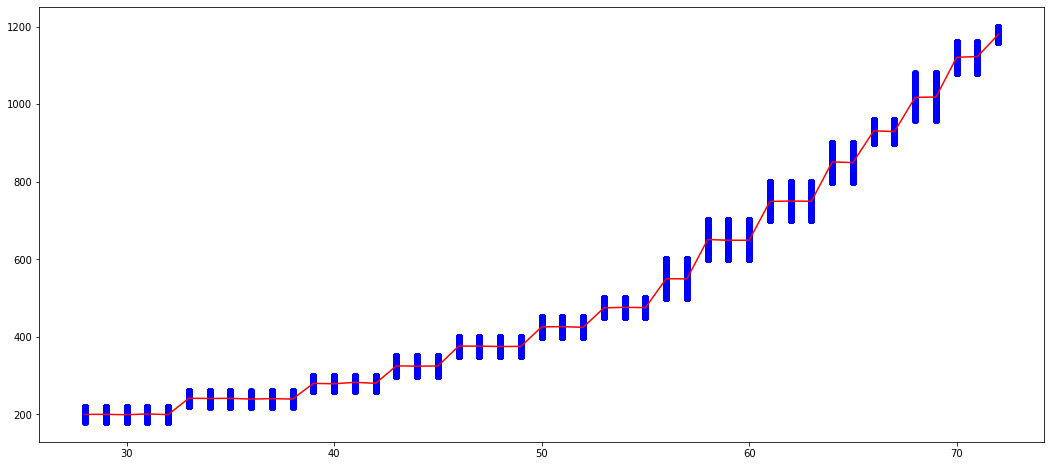

In [8]:
# now plot our training set
plt.subplots(figsize=(18, 8))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train[orders], dtr.predict(X_train)[orders], color='red')

In [9]:
# now predict our dependent values
y_pred = dtr.predict(X_test)
y_pred

array([648.98036649, 851.17807351, 649.06074169, ..., 648.98036649,
       239.12413793, 239.25414365])

In [10]:
# now plot only our best fit lines
orders = np.argsort(X_test.ravel())
orders

array([10101,  1704, 11436, ...,  3251,  4391,  6831])

Text(0.5, 1.0, 'Horse Height and Weight model')

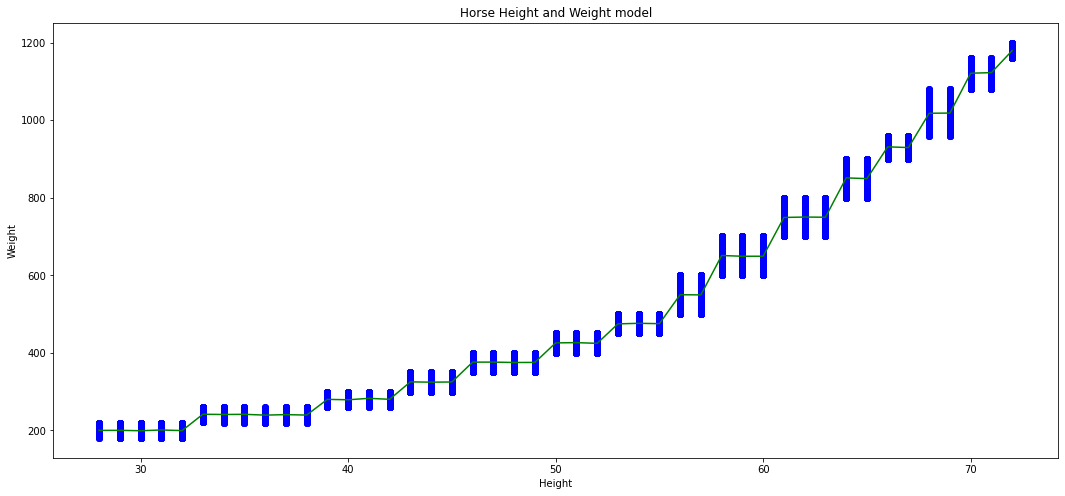

In [11]:
# plotting our model with testing dataset
plt.subplots(figsize=(18, 8))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test[orders], dtr.predict(X_test)[orders], color='green')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Horse Height and Weight model')

In [12]:
# now compute residuals
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  19.805842708752248
MSE:  578.5322700582904
RMSE:  24.052697770900675


In [13]:
# now calculate the accuracy of the model 
accuracy = dtr.score(X_test, y_test) * 100
print('accuracy: ', round(accuracy, 6), end="%")

accuracy:  98.929205%

In [14]:
''' Here, we acheive the highest accuracy than
support vector regressor, polynomial regressor and random-forest.
'''

' Here, we acheive the highest accuracy than\nsupport vector regressor, polynomial regressor and random-forest.\n'